In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats.stats import pearsonr
%matplotlib inline

In [34]:
#import files
titanic = pd.read_csv('titanic_data.csv')

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# First Look at Data & Questions

- What factors made people more likely to survive?
- Is the average age of survivors significantly different from the average age of non-survivors?
- Is there a positive correlation between the fare you paid and the likelihood to survive?
- Is there a positive correlation between a higher social economic status and the fare?
- Is there a significant difference over the social/fare correlation between people coming from the 3 ports?
- Is there any passenger whose age is under 20 who came alone on the titanic?
- Is there someone who payed way more than the average to come on the titanic?

## What factors made people more likely to survive?

In [36]:
# Likelihood to survive if you are a male / female
def prob_to_survive(x,y):
    varx = titanic[titanic[x] == y]
    return varx[varx['Survived'] == 1].count() / varx.count()
print prob_to_survive('Sex','male')[0]
print prob_to_survive('Sex','female')[0]

0.188908145581
0.742038216561


Your likelihood to survive was way higher if you were a women.

In [37]:
# Likelihood to survive according to your Pclass
print prob_to_survive('Pclass',1)[0]
print prob_to_survive('Pclass',2)[0]
print prob_to_survive('Pclass',3)[0]

0.62962962963
0.472826086957
0.242362525458


Your likelihood to survive was way higher if you were coming from a higher socio-economic status.


In [38]:
# Likelihood to survive if you were in family or not
titanic['inFamily'] = np.where(titanic['Parch'] > 0, 'Yes','No')
print prob_to_survive('inFamily','Yes')[0]
print prob_to_survive('inFamily','No')[0]

0.511737089202
0.343657817109


Your likelihood to survive was higher if you came to the titanic with family.

In [39]:
# Likelihood to survive if you were in family or not
titanic['inCouple'] = np.where(titanic['SibSp'] > 0, 'Yes','No')
print prob_to_survive('inCouple','Yes')[0]
print prob_to_survive('inCouple','No')[0]

0.466431095406
0.345394736842


Your likelihood to survive was more importante if you came to the titanic as a couple.

## Is the average age of survivors significantly different from the average age of non-survivors?

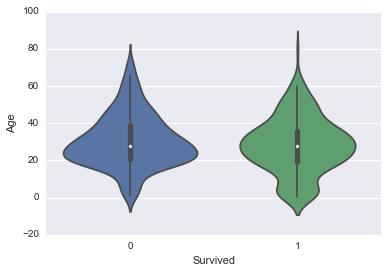

In [40]:
#vizualisation of the data to get a first understanding
titanic_age_viz = titanic[['Survived','Age']].dropna()
ax = sns.violinplot(x="Survived", y="Age", data=titanic_age_viz)


The violin plot chart shows us that the survived violin is larger on the bottom and on the top. It's hard to conclude / draw a strong hypothesis looking at this chart. But because I think childs have been prioritized in boats, my hypothesis will be that the average age of survivors is lower than the average age of non-survivors.

In [41]:
#Data wrangling - creation and cleaning of my two samples
titanic_survivors = titanic[titanic['Survived'] == 1]
titanic_non_survivors = titanic[titanic['Survived'] == 0]
titanic_survivors = titanic_survivors[['Survived','Age']].dropna()
titanic_non_survivors = titanic_non_survivors[['Survived','Age']].dropna()

In [42]:
print titanic_survivors['Age'].count()
print titanic_non_survivors['Age'].count()

290
424


H0: μs = μns - The average age of survivors is not significantly different from the average age of non-survivors.<br>
HA: μns < μs - The average age of survivors is significantly lower from the average age of non-survivors.

I will perform a independent-samples one tail t-test. I choose this test because:
- I’m working with two independent samples of data where independent variable is the survival of the individual.
- Because we don't have the age of every individual on the boat, population parameters like the population standard deviation are unknown. 
- we assume that the two samples are selected from a normal population.

I’ll use a critical statistic value of 0.05%.



In [43]:
print titanic_survivors['Age'].mean()
print titanic_non_survivors['Age'].mean()

28.3436896552
30.6261792453


In [44]:
t = (titanic_survivors['Age'].mean() - titanic_non_survivors['Age'].mean()) / m.sqrt((titanic_survivors['Age'].var() / titanic_survivors['Age'].count()) +  (titanic_non_survivors['Age'].var() / titanic_non_survivors['Age'].count()))
t

-2.046030104393971

**t(712) = -2.0460, p<.05, one-tailed **<br>

t-critical value = -1.646 with 712 degree of freedom.

Based on this t test, we can reject the null hypothesis and conclude that age of survivors is significantly lower than the age of non-survivors. 

HA: μns < μs

Results match my expectations. Let's calculate r2 to see how much the age influenced the survival of an individual.

In [45]:
r = t**2/((t**2)+712)
r*100

0.5845182382772652

r2 indicates that even if the age of survivors is significantly lower than the age of non-survivors, that variable does not explained the variability of our independent variable, the survival of individuals in the ship.

We might then make the hypothesis that the sex was the variable having the higher impact on the survival of the individual, women might have been prioritized to take lifeboats, and women might be younger than man in the boat and might have take their child with them. 

## Is there a positive correlation between the fare you paid and the likelihood to survive?

In [46]:
# Likelihood to survive according to your fare

In [47]:
titanic_fare_norm = (titanic['Fare'] - titanic['Fare'].mean()) / (titanic['Fare'].std(ddof=0))
titanic_survived_norm = (titanic['Survived'] - titanic['Survived'].mean()) / (titanic['Survived'].std(ddof=0))
print pearsonr(titanic_fare_norm,titanic_survived_norm)

(0.25730652238496238, 6.1201893419218733e-15)


There is a weak correlation between the fare you paid and your likelihood to survive.

## Is there a positive correlation between a higher social economic status and the fare?


In [48]:
titanic_fare_norm
titanic_status_norm = (titanic['Pclass'] - titanic['Pclass'].mean()) / (titanic['Pclass'].std(ddof=0))
print pearsonr(titanic_status_norm,titanic_fare_norm)

(-0.54949961994390772, 1.967386173421735e-71)


There is a moderate positive correlation between the social economic status of an individu and its likelihood to survive.

## Is there a significant difference over the social/fare correlation between people coming from the 3 ports?

In [49]:
titanic_c = titanic[titanic['Embarked'] == 'C']
titanic_q = titanic[titanic['Embarked'] == 'Q']
titanic_s = titanic[titanic['Embarked'] == 'S']
print titanic_c.count()[0]
print titanic_q.count()[0]
print titanic_s.count()[0]

168
77
644


In [50]:
def two_variables_correl(x,y,z):
    titanic_x = titanic[titanic['Embarked'] == x]
    titanic_y_norm = (titanic_x[y] - titanic_x[y].mean()) / (titanic_x[y].std(ddof=0))
    titanic_z_norm = (titanic_x[z] - titanic_x[z].mean()) / (titanic_x[z].std(ddof=0))
    return pearsonr(titanic_y_norm,titanic_z_norm)

In [51]:
print two_variables_correl('C','Pclass','Fare')
print two_variables_correl('Q','Pclass','Fare')
print two_variables_correl('S','Pclass','Fare')

(-0.53074496414378758, 1.3610129246625369e-13)
(-0.76375898114758789, 6.5820176087137024e-16)
(-0.54275836201108951, 1.2948466266354948e-50)


The correlation between the social economic status and the fare is moderate and quite similar for people who came from Cherbourg and Southampton.
Regarding people who came from Queenstown, the correlation between these two variables is really strong.

# Is there any passenger whose age is under 20 who came alone in the ship?

In [52]:
#Data wrangling - dealing with missing Age values.

In [53]:
titanic_age = titanic[['Survived','Age']]

In [54]:
titanic_age_cleaned = titanic_age.dropna()
print titanic_age_cleaned.count()

Survived    714
Age         714
dtype: int64


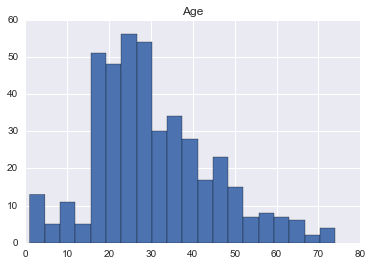

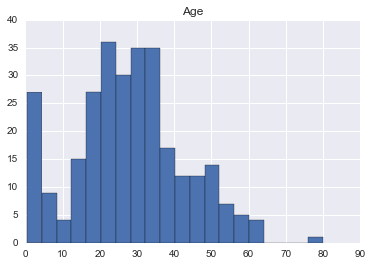

In [55]:
t_age_graph = titanic_age_cleaned.groupby(['Survived']).hist(stacked=True, bins=20)

We can notice on the two charts above that the histogram plotting the age of survivors is more positively skewed than the histogram plotting the age of people who died.

In [56]:
titanic_age_family = titanic[['Age','Parch','Survived']].dropna()

50


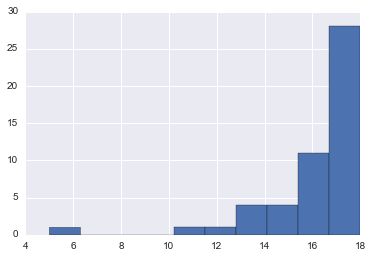

In [68]:
titanic_alone_child = titanic_age_family[(titanic_age_family['Age'] <= 18) & (titanic_age_family['Parch'] < 1)] 
titanic_not_alone_child = titanic_age_family[(titanic_age_family['Age'] <= 18) & (titanic_age_family['Parch'] > 1)] 
print titanic_alone_child.Age.count()
t_alone_child = titanic_alone_child.Age.hist()

50 childs were into the titanic without any parents.

In [58]:
titanic_alone_child.groupby(['Survived']).size()

Survived
0    30
1    20
dtype: int64

In [59]:
titanic_not_alone_child.groupby(['Survived']).size()

Survived
0    19
1    21
dtype: int64

A child alone has less chance to survive than a regular child on the Titanic. Only 40% of childs without any parent survived during the tragedy whereas 50% of childs with a parent on the boat survived.

# Is there someone who payed way more than the average to come on the titanic?

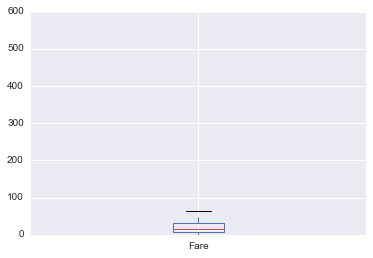

In [60]:
titanic['Fare'].plot.box()

In [61]:
titanic[np.abs(titanic['Fare']-titanic['Fare'].mean())>=(3*titanic['Fare'].std())].count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
inFamily       20
inCouple       20
dtype: int64

In [62]:
outliers = titanic[np.abs(titanic['Fare']-titanic['Fare'].mean())>=(3*titanic['Fare'].std())]
outliers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inFamily,inCouple
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Yes,Yes
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Yes,Yes
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Yes,No
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,No,No
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Yes,No


In [63]:
outliers.groupby(['Survived']).size()

Survived
0     6
1    14
dtype: int64

70% of outliers survived during the sinking but because of the small size of the sample, it's really hard to conclude that this is significant.